# 3) Reporte de Síntesis de bases de datos

> 3.1) Desarrollo de las bases de datos 

> 3.2) Descripción cualitativa y cuantitativa del dataset 

> 3.3) visualización de las bases de datos generadas

> 3.4) Metadata y bases de datos obtenidas posterior al uso de inteligencia artificial

> 3.5) Bases de datos generadas para la competencia de Kaggle

> 3.6) Base de datos de imagenes (thumbnails) para entrenamiento de reconocimiento de imagen 

Para la sintesis de las bases de datos se obtuvo la data de 66 canales de diferentes contenidos y diferentes audiencias. El metodo de las celulas en la parte inferior obtiene bases de datos directo del API de Youtube con las siguientes restricciones: Solo se pueden obtener 10,000 data points al dia, no se pueden obtener meta-datos de los canales seleccionados como epocas o tendencias. Existen 3 tipos de bases de datos que constituyen nuestros parametros de estudio, Una que hace referencia a la data albergada en el canal del creador de contenido, otra para los videos individuales de cada canal y  una ultima que nos da una lista de comentarios por video en orden cronologico.

Las células inferiores constituyen una representación de la estructura de las bases de datos obtenidas y una representación estadística del contenido de cada una.





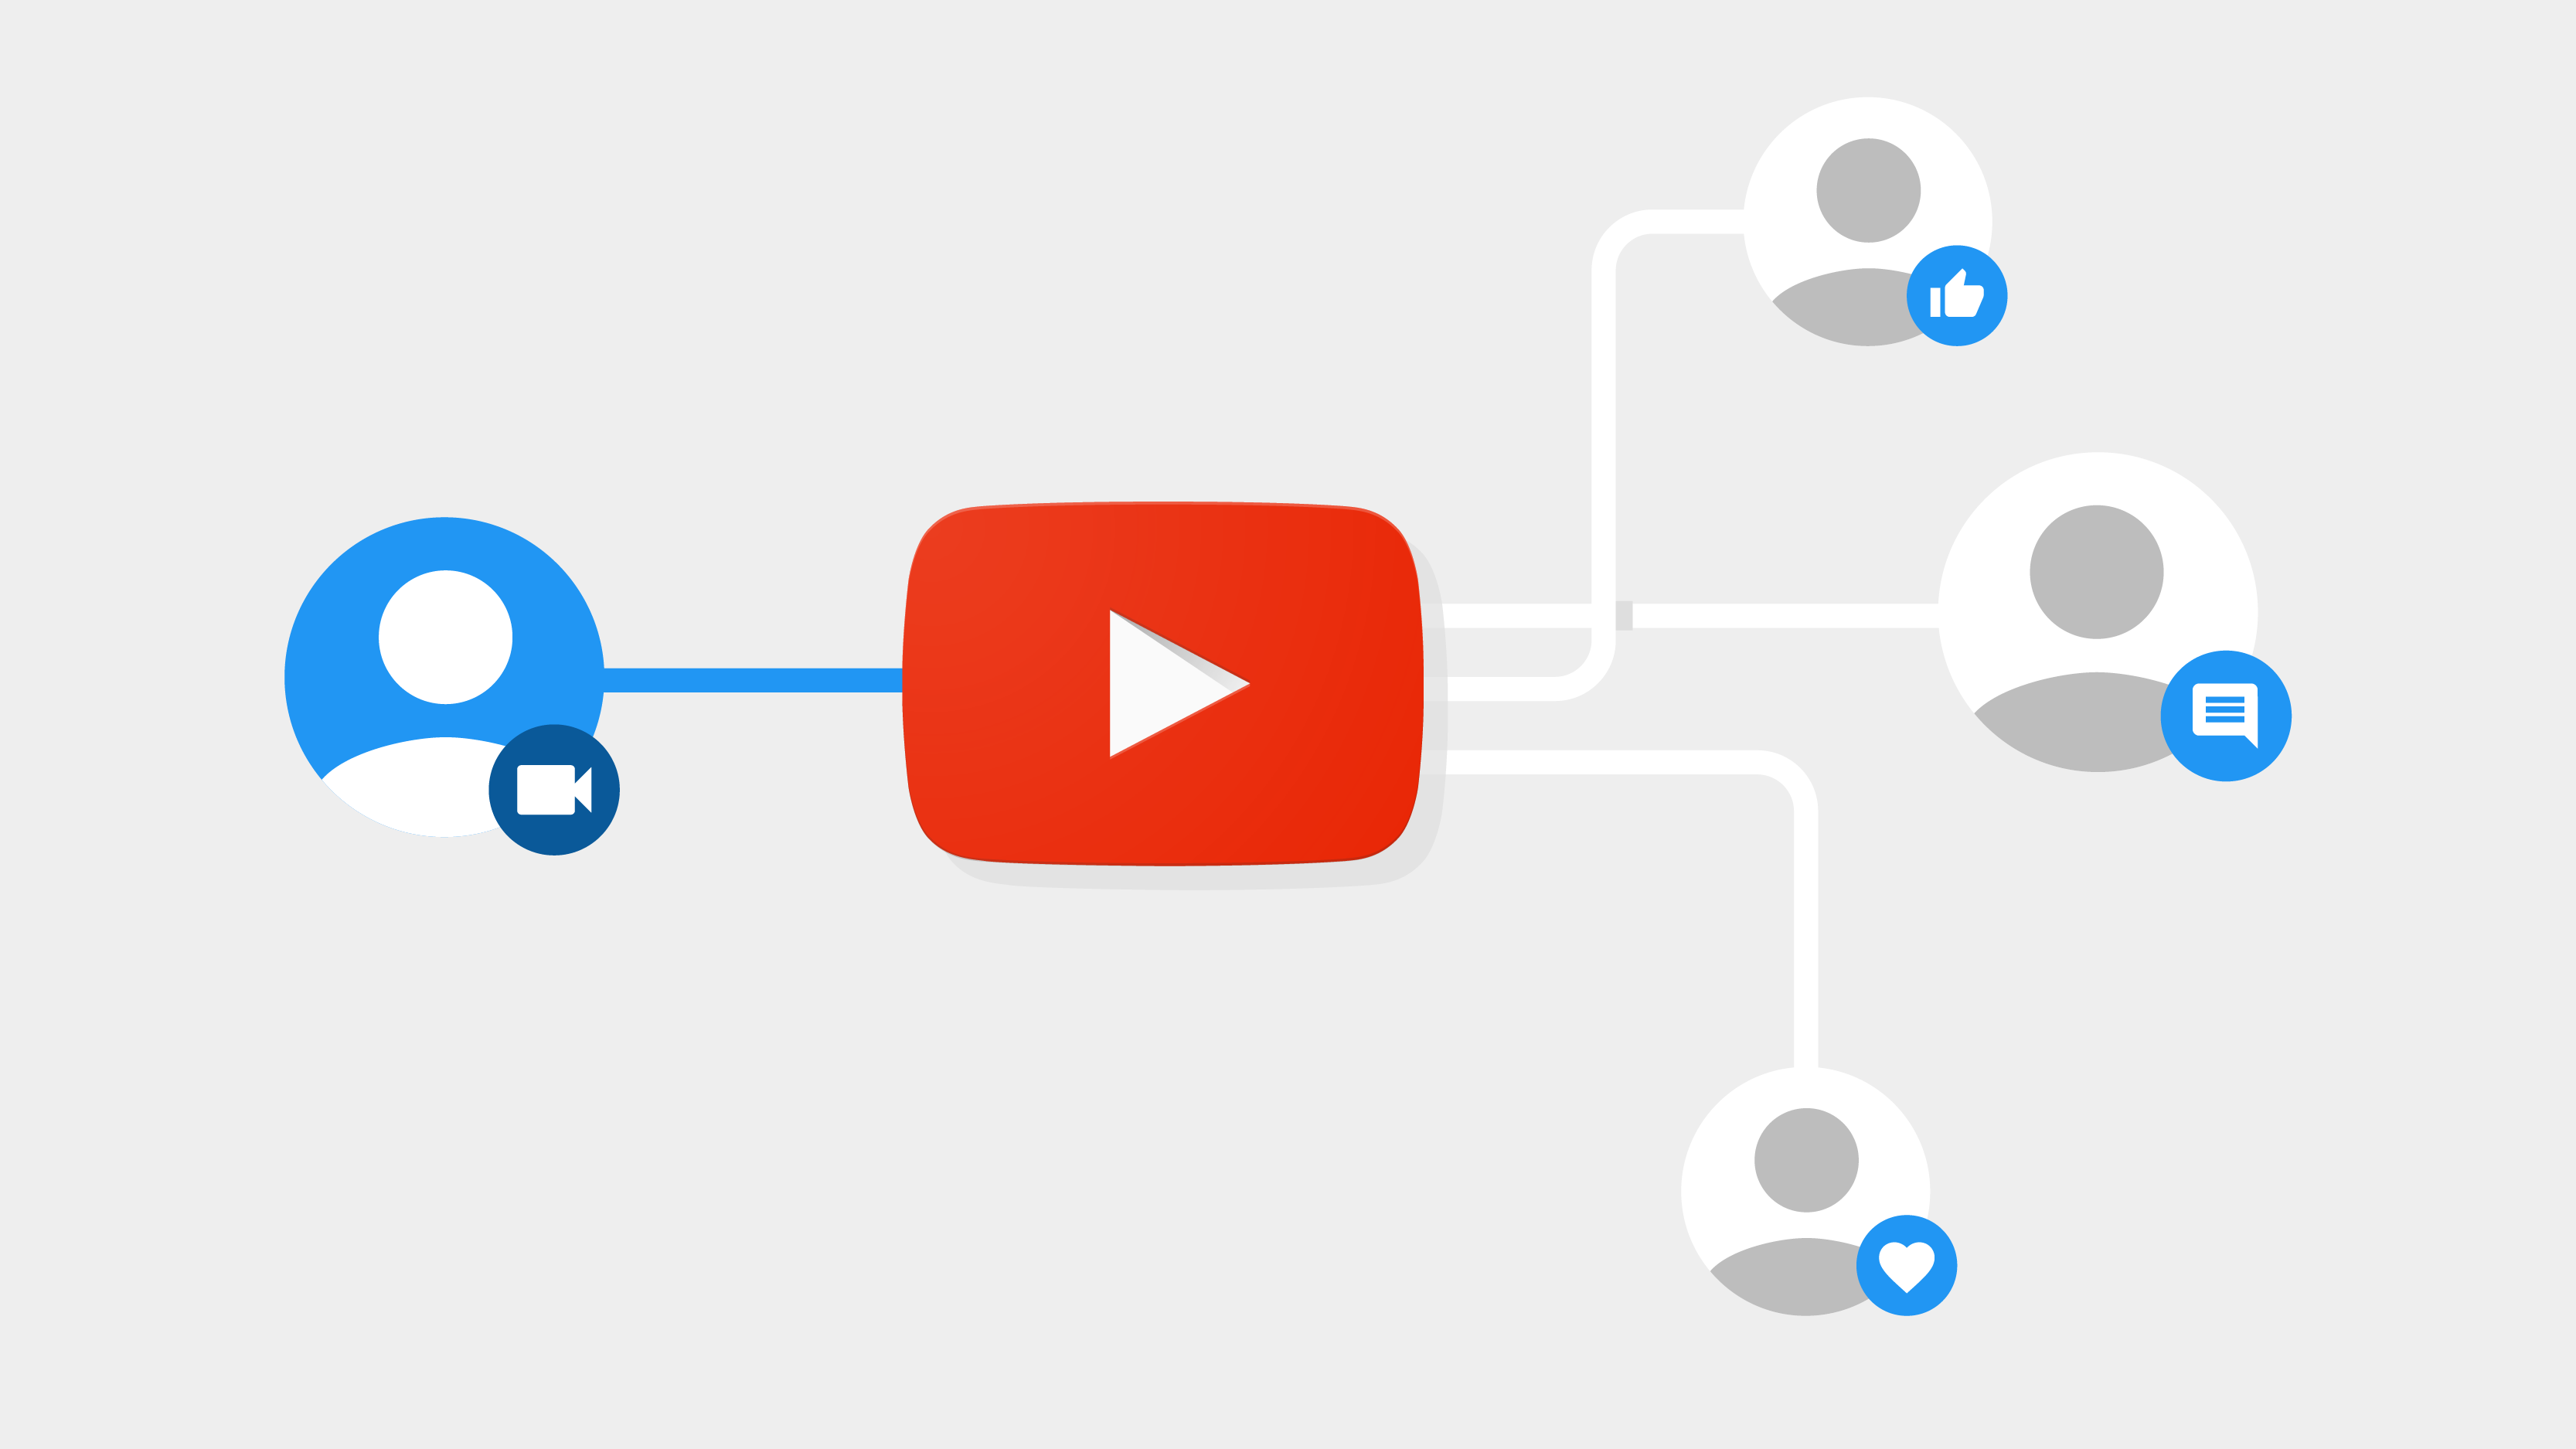
##### Las bases de datos originales se encuentran en https://github.com/metacubeccd/CCD asi como las bases de datos que fueron generadas a través de extracción de metadata y feature engineering. 
Se anexan las documentaciones de las librerias empleadas para el desarrollo de las aplicaciones para la mineria de datos de youtube:

https://developers.google.com/youtube/v3/

https://pandas.pydata.org/pandas-docs/stable/index.html

https://seaborn.pydata.org/index.html


### 3.1) Descarga de las bases de datos obtenidas :
el siguiente gurpo de celulas descarga la base de datos de los canales y convierte algunas propiedades en las columnas que cuentan con un valor numerico para poder utlilizar los numeros de vistas, suscriptores y total de videos, de esta manera podremos determinar sus propiedades estadisticas y darnos cuenta de la morfologia de cada canal individual.

Finalmente las bases de datos se almacenan en el servidor y se concatinan con el resto de canales en la muestra del estudio para desarrollar el modelo final y tener una base de datos lo suficientemente grande para mejorar la sensibilidad y la especificidad de los modelos de inteligencia artificial por desarrollar.

In [ ]:
channel_data = get_channel_stats(youtube, channel_ids)
channel_data

In [ ]:
# Convert count columns to numeric columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_data[numeric_cols] = channel_data[numeric_cols].apply(pd.to_numeric, errors='coerce')
channel_data.to_csv('channel_data.csv')


In [ ]:
video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # get video data
    video_data = get_video_details(youtube, video_ids)
    # get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)

    # append video data together and comment data toghether
    video_df = video_df.append(video_data, ignore_index=True)
    comments_df = comments_df.append(comments_data, ignore_index=True)

In [ ]:
video_df.to_csv('video_data.csv')
comments_df.to_csv('comments_data.csv')


### 3.2)  Descripción cualitativa y cuantitativa del dataset 
En las siguientes  células se determina la muestra del universo del estudio, esta consiste en creadores de contenido de youtube que cumplen con las siguientes características:
> * creadores de contenido que desarrollan propiedad intelectual, material único con identidad propia
> * contenido en español, predominantemente mexicano pero incluyendo también paises de america latina
> * se incluyeron creadores de contenido que no cuentan con propiedad intelectual de su contenido (bloggers, influencers, product reviews, gamers ...) con el fin de generar una base de datos robusta para poder tener una mejor sensibilidad y especificidad en los modelos entrenados 

### Limitaciones de la data :
La base de datos obtenida está basada en el mundo real y es apropiada para el estudio, sin embargo la muestra del estudio tiene algunos problemas. En primer lugar fue obtenida a través del conocimiento personal de los creadores de propiedad intelectual ya que no existe una forma de diferenciar el contenido seleccionado de el omitido en youtube o social blade.

Existe disparidad entre los canales en cuanto a popularidad, tamaño y tipo de contenido. Durante el estudio nos dimos cuenta de lo pequeño que es el universo de creadores de propiedad intelectual latinos en youtube y por lo tanto decidimos incorporar creadores de contenido de otra índole al estudio.

Estas modificaciones a la hipótesis original incrementaron las posibilidades para desarrollar un estudio más robusto, así mismo, la creación del proyecto original va a facilitar la posibilidad de expandir la muestra de estudio para incluir más creadores de contenido en un futuro y poder utilizar las mismas técnicas empleadas en este análisis para discernir información de canales de YT con otra indole de contenido.

### 3.3) visualización de las bases de datos generadas:

Las células inferiores son una representación gráfica de las bases de datos obtenidas con una descripción estadística de cada una, las bases de datos generadas han sido almacenadas en nuestro repositorio de github y están disponibles para su uso a través de nuestra plataforma.


En orden descendente se encuentran las bases de datos de los canales de la muestra del estudio, también se encuentra una gráfica con la distribución estadística central de cada columna dentro del grupo de los canales. Posteriormente se encuentra una representación visual de la base de datos obtenida de los videos individuales de los canales con su tabla de distribución estadística central por columna, y finalmente una muestra de la base de datos de los comentarios. Cada una de estas bases de datos fue utilizada para el desarrollo de la síntesis de gráficas estadísticas con propósito de diagnóstico también como para la implementación de síntesis de representaciones visuales en la página web


In [3]:
import pandas as pd
channels = pd.read_csv('channel_data_final.csv')
channels.drop('Unnamed: 0', axis=1, inplace=True)
channels

,channelName,subscribers,views,totalVideos,playlistId
0,EEG,1740000,1616271673,15332,UUZSJ9bCN0Kh8vJImfacvkFg
1,Teleantioquia,511000,121905317,38510,UUeq_SgWZDF8h-ujzwBXI5jQ
2,Juan De Montreal,1650000,479065947,1075,UUtUIhr_2EOuLdeAnFYMNnkg
3,Katia Nabil,1260000,127790680,391,UUyIE18PSCKxomVDaJ0lEGFw
4,Exitosa Noticias,749000,284204440,39447,UUxgO_rak_BKZP8VNVmYqbWg
...,...,...,...,...,...
61,ReviewerRandom2,11700,2309433,233,UUy_Lld-irecX4uqe5rsGNkg
62,FRANCE 24 Español,1120000,372431083,28525,UUUdOoVWuWmgo1wByzcsyKDQ
63,Luisito Comunica,39200000,7713636701,1121,UUECJDeK0MNapZbpaOzxrUPA
64,Beast Reacts en Español,5660000,433842332,49,UUL6Xc5xuRECnWbGBOKG9APA


#### Representación visual de la distribución estadística central de los canales utilizados para el estudio

Se recomienda al lector regresar al breviario de estadística para interpretar las distribuciones de los canales.

Dentro de esta distribución se puede apreciar la media, moda y mediana de las células que contienen propiedades numéricas así como la proporción en la distribución de los cuartiles de la distribución central.


In [4]:
channels.describe()

,subscribers,views,totalVideos
count,6.600000e+01,6.600000e+01,66.000000
mean,4.728458e+06,1.176915e+09,6696.863636
std,9.226062e+06,2.348696e+09,14527.163483
min,5.250000e+03,1.204530e+05,4.000000
25%,5.480000e+05,1.262035e+08,187.000000
50%,1.135000e+06,3.008691e+08,689.000000
75%,3.007500e+06,9.560280e+08,3128.250000
max,4.620000e+07,1.370205e+10,77424.000000


#### Base de datos resultado del contenido de los videos individuales :

In [7]:
videos = pd.read_csv('video_data_final.csv')
videos.drop('Unnamed: 0', axis=1, inplace=True)
videos

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords
0,uCqLtZhf8xw,ElTrollino,¡PASAMOS de TIENDA de MASCOTAS NOOB a TIENDA d...,Vídeo en español de Roblox Tycoon donde pasamo...,['roblox'],2022-07-28T18:15:03Z,819935.0,35640.0,NaN,1343.0,PT15M25S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xkQKH6-uNyE,ElTrollino,¡HACKER NOS ENCIERRA EN LA PRISIÓN DE BEDROCK!...,El hacker nos encierra en la prisión más segur...,['minecraft'],2022-06-18T20:45:18Z,3900502.0,112102.0,NaN,2620.0,PT22M19S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MWNpBHATT-w,ElTrollino,¡NO ENCUENTRO a LYNA en el LABERINTO! 😱 JUGAMO...,Vlog de Paris y Disney Land donde jugamos al e...,['escondite'],2022-06-10T18:54:53Z,2827316.0,77892.0,NaN,1710.0,PT13M23S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6Qg_FpyPY-Y,ElTrollino,¡PASAMOS de GRANJA NOOB a GRANJA PRO en ROBLOX...,Vídeo en español de Farm life Tycoon donde pas...,['roblox'],2022-06-04T18:20:42Z,2692418.0,80655.0,NaN,2659.0,PT12M47S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IgNj4zJ-Tv0,ElTrollino,¡Me ESCONDO DENTRO de una MESA DE CRAFTEO! 😂 E...,"El escondite en minecraft con mods, me escondo...",['minecraft'],2022-05-28T18:00:16Z,4171162.0,196737.0,NaN,3183.0,PT12M22S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,l1Pb4iDb9_k,TUDN México,¡ALARMANTE! Marcel cae tendido | Toluca 1-1 Ti...,Marcel Ruíz recibe tremendo cabezazo y cae ten...,"['Televisa', 'Univision', 'TUDN', 'Televisa de...",2022-08-07T17:56:50Z,17094.0,132.0,NaN,15.0,PT2M6S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2269,PwxreygiNBo,TUDN México,¡EL SHOW DEL SPIDER! Atajadón a una mano | Tol...,Orozco se tira a una mano e impide la volteret...,"['Televisa', 'Univision', 'TUDN', 'Televisa de...",2022-08-07T17:48:31Z,4191.0,33.0,NaN,0.0,PT30S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,RqZM_ofyjgw,TUDN México,¡Era un MEGA GOLAZO del 'takeshi'! | Toluca 1-...,Meneses se genera una gran jugada en el área y...,"['Televisa', 'Univision', 'TUDN', 'Televisa de...",2022-08-07T17:45:11Z,10862.0,69.0,NaN,2.0,PT26S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,iM8aIV2fZgM,TUDN México,¡SE EMPATÓ! GOOL de ‘Charly’ González | Toluca...,‘Charly’ González se estrena con los diablos. ...,"['Televisa', 'Univision', 'TUDN', 'Televisa de...",2022-08-07T17:42:42Z,50103.0,392.0,NaN,29.0,PT1M23S,hd,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Representación visual de la distribución estadística central de los videos utilizados para el estudio

Se recomienda al lector regresar al breviario de estadística para interpretar las distribuciones de los canales.

Dentro de esta distribución se puede apreciar la media, moda y mediana de las células que contienen propiedades numéricas así como la proporción en la distribución de los cuartiles de la distribución central.

In [6]:
videos.describe()

,viewCount,likeCount,favouriteCount,commentCount,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
count,2.273000e+03,2.256000e+03,0.0,2212.000000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,1.130312e+06,4.868890e+04,NaN,1912.338156,707.32400,19.864000,53.807400,2.327832,48.188000
std,3.735320e+06,1.392970e+05,NaN,8287.364267,829.54156,11.980804,33.514977,2.959063,15.388694
min,0.000000e+00,0.000000e+00,NaN,0.000000,13.00000,0.000000,18.520054,0.204669,4.000000
25%,1.200500e+04,4.787500e+02,NaN,18.000000,200.00000,9.250000,31.242022,0.794102,39.000000
50%,6.029200e+04,2.451500e+03,NaN,140.000000,539.00000,23.000000,39.008573,1.300265,48.000000
75%,6.219580e+05,3.035350e+04,NaN,1053.250000,811.75000,29.000000,71.069971,2.824610,59.000000
max,6.308480e+07,2.211246e+06,NaN,212981.000000,6178.00000,41.000000,181.641350,31.089929,100.000000


#### Base de datos resultado de la descarga del contenido de los comentarios por video 

In [8]:
comments = pd.read_csv('comments_data_final.csv')
comments

,video_id,comments,comments_no_stopwords
0,uCqLtZhf8xw,['Trollino por fin azes vídeos te echaba de me...,NaN
1,xkQKH6-uNyE,['Me gusta que todos nos unimos en comunidad!'...,NaN
2,MWNpBHATT-w,['Cuando me piden comida yo voy a decir: ¡Trol...,NaN
3,6Qg_FpyPY-Y,"['Si', 'Trollino siempre te alegra el día 💛', ...",NaN
4,IgNj4zJ-Tv0,"['Cierto jugar con us tedes', 'Tú videos me gu...",NaN
...,...,...,...
66268,sRIiKyBbTGM,['Chivas siempre goleó a San Oswaldo\n\nCon Am...,NaN
66269,nMjcx6OBKv8,['eso es mis leones Negros a ganar Saludos a T...,NaN
66270,259w1uMKWxE,['Antes los marcadores eran así de grandes por...,NaN
66271,dKc0sQ4CKh8,"['En qué canal', 'chale, mentanle al diseño , ...",NaN


### 3.4) Metadata y bases de datos obtenidas posterior al uso de inteligencia artificial


el siguiente bloque de celdas de código refleja una representación visual da las bases de datos obtenidas posterior al modelaje y transformación realizado por nuestros modelos de procesamiento de lenguaje nativo y comprensión de lenguaje nativo y son la base para el desarrollo de la competencia de kaggle para impulsar el desarrollo en méxico de inteligencia artificial aplicada a la propagación de contenido de propiedad intelectual 

as columnas en la parte inferior con los nombres FACILITY, LOCATION, GPE, ORGANIZATION, O, GSP
PERSON
tienen la función clasificar entidades dentro del texto en establecimientos, locaciones, eventos geopolíticos, organizaciones, entidades geográficas como países, ciudades, bosques, ríos etc… 
y personas respectivamente


En la base de datos se puede observar como nuestro algoritmo puede determinar el sentimiento de cada comentario de una forma precisa en un espectro que oscila entre -1 (negativo) y 1(positivo) con 0 siendo el carácter que determina neutralidad.


In [12]:
nlp = pd.read_csv('kaggle_ready.csv')
nlp.drop(['Unnamed: 0', 'comments_no_stopwords'], axis=1, inplace=True)
nlp.head(20)

,video_id,comments,FACILITY,LOCATION,GPE,ORGANIZATION,O,GSP,PERSON,sentiment
0,t0OzUTYAYSg,Súper canelo,0.0,0.0,1.0,0.0,0,0.0,0.0,0.960916
1,t0OzUTYAYSg,Súper,0.0,0.0,1.0,0.0,0,0.0,0.0,0.724248
2,t0OzUTYAYSg,CANELO A DE SER DEL PRI SOLO SABE ROBAR Y HACE...,0.0,0.0,1.0,0.0,0,0.0,0.0,-0.826602
3,t0OzUTYAYSg,Hace rato se aventaron un tiro aquí en mi barr...,0.0,0.0,1.0,0.0,0,0.0,0.0,-0.451442
4,t0OzUTYAYSg,Boxeo decadente..,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000
5,snzdubLe504,Realmente todo aquello que me molesta del otro...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.602585
6,snzdubLe504,La pregunta es : Como nos quitamos todos esos...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.794145
7,snzdubLe504,NO ESTOY DE ACUERDO CON ESTE SEÑOR EN LO DE LA...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.692297
8,3Yfnx1U7mvE,antes de que lo vea un medico laboral de colpe...,0.0,0.0,0.0,2.0,0,0.0,0.0,-0.543970
9,v1aYweBdEoA,Título de mrd,0.0,0.0,1.0,0.0,0,0.0,0.0,-0.820419


### 3.5) Bases de datos generadas para la competencia de Kaggle
En esta última sección del reporte se demuestra el desarrollo de las bases de datos generadas para la competencia de kaggle, las cuales consisten en la base de datos de la metadata obtenida por nuestro modelo de comprensión de lenguaje nativo, dividida de tal forma que los competidores puedan tomar una muestra de la misma para entrenamiento de sus algoritmos, mientras que cuenten con una segunda base de datos sin el objetivo, en este caso la calificación del sentimiento con la que se etiqueto el comentario

y finalmente una base de datos con solamente las respuestas correctas a los objetivos de el modelo de comprensión de lenguaje nativo para interpretación de sentimientos

Esta es una representación visual de la distribución de las bases de datos para el entrenamiento y la validación  por medio de la cual los competidores harán sus algoritmos predictivos
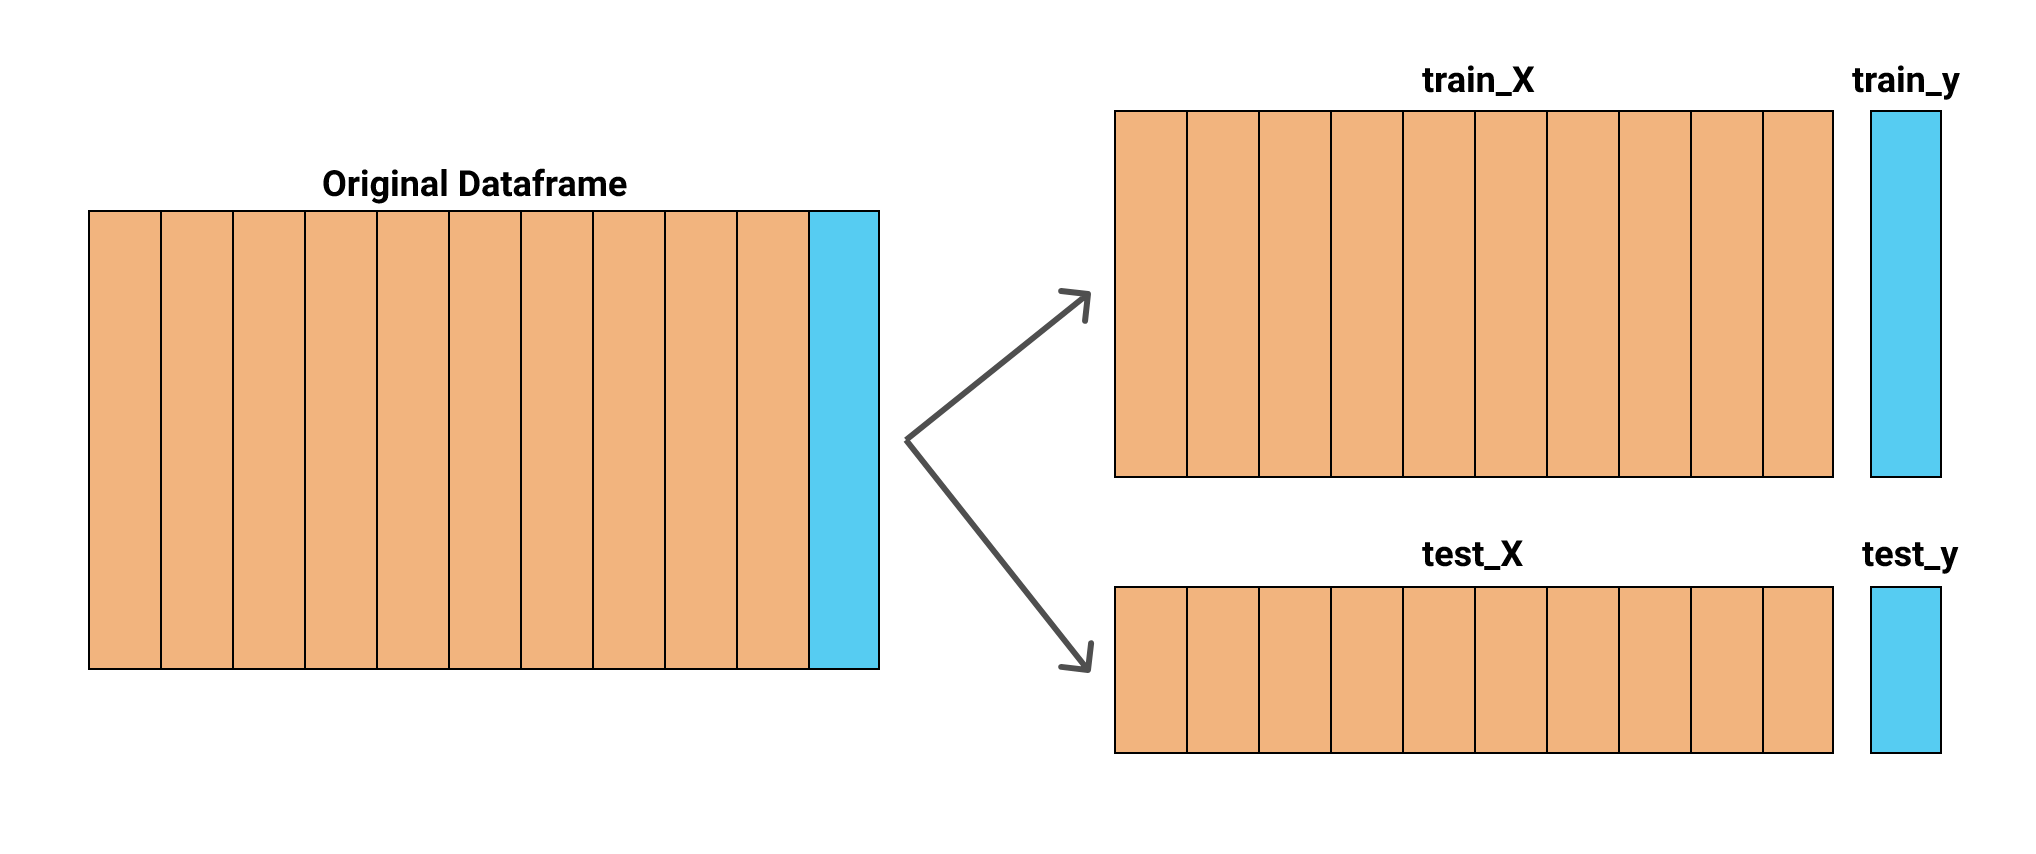

In [14]:
train = pd.read_csv('train.csv')
train.drop(['Unnamed: 0'], axis=1, inplace=True)
train

,video_id,comments,FACILITY,LOCATION,GPE,ORGANIZATION,O,GSP,PERSON,sentiment
0,yC4NEGlEbAg,"damas y caballeros ya no subira piratas :,v",0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000
1,gdyWTvpSs1Q,NaN,0.0,0.0,0.0,6.0,0,0.0,0.0,-0.283853
2,ReyuEhHNgi4,Justin Gayber es homosexual.,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000
3,bM9ekmNMjxM,Buen video!!!,0.0,0.0,1.0,0.0,0,0.0,0.0,-2.000000
4,aic4hhYCv1Q,Ayuden a estos leoncitos por favor,0.0,0.0,0.0,0.0,0,0.0,0.0,-0.522478
...,...,...,...,...,...,...,...,...,...,...
29405,lRKTNS6CeEk,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,-0.283853
29406,UW5TFLsQNLk,Quiero una B-wing,0.0,0.0,1.0,0.0,0,0.0,0.0,-0.770435
29407,UW5TFLsQNLk,el juego en lo que a gráficos se refiere parec...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000
29408,E1oRLeR2xOk,Willy no encontraste las pastillas para dormir...,0.0,0.0,1.0,0.0,0,0.0,0.0,-0.692092


In [15]:
test = pd.read_csv('test.csv')
test.drop(['Unnamed: 0'], axis=1, inplace=True)
test

,video_id,comments,FACILITY,LOCATION,GPE,ORGANIZATION,O,GSP,PERSON
0,yC4NEGlEbAg,"damas y caballeros ya no subira piratas :,v",0.0,0.0,1.0,0.0,0,0.0,0.0
1,gdyWTvpSs1Q,NaN,0.0,0.0,0.0,6.0,0,0.0,0.0
2,ReyuEhHNgi4,Justin Gayber es homosexual.,0.0,0.0,0.0,0.0,0,0.0,0.0
3,bM9ekmNMjxM,Buen video!!!,0.0,0.0,1.0,0.0,0,0.0,0.0
4,aic4hhYCv1Q,Ayuden a estos leoncitos por favor,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7348,M8sHrUmrKQY,Cuál?,0.0,0.0,1.0,0.0,0,0.0,0.0
7349,TC_DMOYHcHQ,Diego y Manu son espectacularmente BELLOS 😍✨😍✨...,0.0,0.0,1.0,0.0,0,0.0,0.0
7350,xYnfr41MdwE,""" Fingete débil para que el enemigo se vuelva ...",0.0,0.0,1.0,0.0,0,0.0,0.0
7351,W10P2VFQIYw,a mi me pasa lo mismo,0.0,0.0,1.0,0.0,0,0.0,0.0


In [17]:
solution = pd.read_csv('solution.csv')
solution.drop(['Unnamed: 0','video_id'], axis=1, inplace=True)
solution.head(20)

,sentiment
0,0.960916
1,0.724248
2,-0.826602
3,-0.451442
4,0.000000
5,0.602585
6,0.794145
7,0.692297
8,-0.543970
9,-0.820419



### 3.6) Base de datos de imágenes (thumbnails) para entrenamiento de reconocimiento de imagen 

La siguiente representación de la base de datos es una clasificación de imágenes en formato .jpg de miniaturas de los videos de cada canal, las bases pueden ser descargadas directo desde kaggle introduciendo la primer célula de código en la parte inferior, o bien están disponibles en nuestro github https://github.com/metacubeccd/CCD.


In [ ]:
kaggle kernels output egoluback/youtube-previews-classification-with-custom-cnn -p /path/to/dest

In [18]:
thumbnails = pd.read_csv('C:/Users/qsavy_1/CCD/ccd_meta/reporte/thumbnails/metadata.csv')
thumbnails

,Id,Channel,Category,Title
0,OkmNXy7er84,3Blue1Brown,Science,The hardest problem on the hardest test
1,r6sGWTCMz2k,3Blue1Brown,Science,But what is a Fourier series? From heat flow t...
2,bBC-nXj3Ng4,3Blue1Brown,Science,But how does bitcoin actually work?
3,aircAruvnKk,3Blue1Brown,Science,"But what is a neural network? | Chapter 1, Dee..."
4,HEfHFsfGXjs,3Blue1Brown,Science,The most unexpected answer to a counting puzzle
...,...,...,...,...
2510,In0nB0ABaUk,Web Dev Simplified,Tech,JavaScript Form Validation
2511,y17RuWkWdn8,Web Dev Simplified,Tech,Learn DOM Manipulation In 18 Minutes
2512,O6P86uwfdR0,Web Dev Simplified,Tech,Learn useState In 15 Minutes - React Hooks Exp...
2513,DUg2SWWK18I,Web Dev Simplified,Tech,MVC Explained in 4 Minutes
